# 机器学习实战

In [27]:
# 加载数据处理相关库
import pandas as pd
import numpy as np
# 加载操作系统库，操作路径
import os
# 加载压缩文件处理库
import tarfile
# 操作url的库
import urllib
# 绘图库
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# 设置图形样式
sns.set(style = 'whitegrid', context = 'notebook')

## 下载数据

In [2]:
# 设置下载地址
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH):
    # 判断本地目录中是否存在该文件夹
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    # 创建本地文件存放路径
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # 将url对象下载并存放在filename路径
    urllib.request.urlretrieve(housing_url, tgz_path)
    # 作为压缩文件打开
    housing_tgz = tarfile.open(tgz_path)
    # 将该压缩文件解压到path中
    housing_tgz.extractall(path=housing_path)
    # 关闭压缩文件，释放内存
    housing_tgz.close()

## 加载数据

In [19]:
def load_housing_data(housing_path=HOUSING_PATH):
    # 在路径中寻找housing.csv文件并加载数据到DataFrame
    csv_path = os.path.join(housing_path, 'housing.csv')
    # 从当前路径出发查找该路径
    return pd.read_csv(csv_path)

## 快速查看数据结构

In [20]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


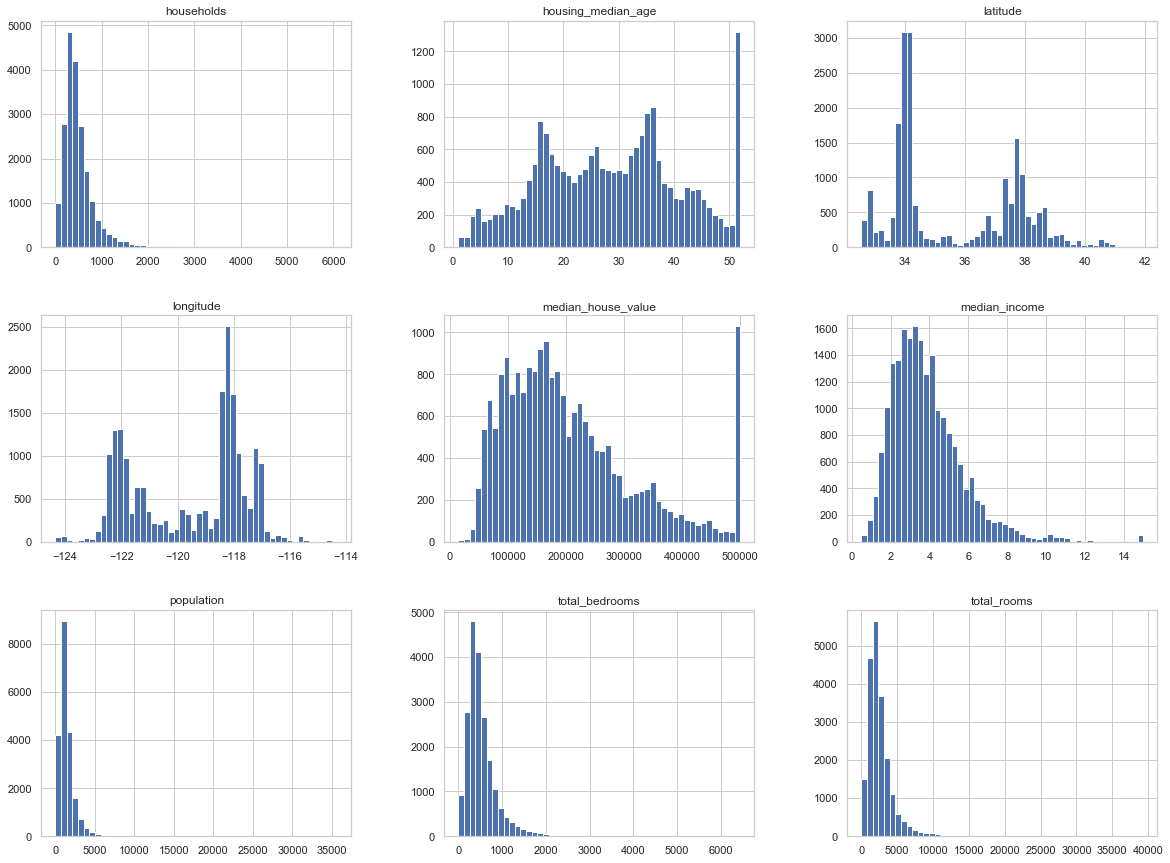

In [29]:
housing.hist(bins = 50, figsize =(20, 15));

## 创建训练集和测试集
### 1. 随机抽样

In [34]:
def split_train_test(data, test_ratio):
    # 随机数生成器种子，让下面的随机数生成器始终生成同样的随机数数组
    np.random.seed(42)
    # 生成一个打乱顺序和data等长的序列数组
    shuffled_indices = np.random.permutation(len(data))
    # 根据ratio确定test数据的长度
    test_set_size = int(len(data)*test_ratio)
    # 提取指定长度的索引编号数组
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # 通过索引数组取值
    return data.iloc[test_indices], data.iloc[train_indices]

In [35]:
test_set, train_set = split_train_test(housing, 0.2)
len(test_set),len(train_set)

(4128, 16512)

上述创建测试集、训练集的方式存在一个缺陷，就是每次更新或增添新数据时，需要重新分配数据，之前的训练集会并被放进测试集，这样会导致模型多次训练后差异过大的问题，故可采取下面sciki库自带的方法，能够保证即便在增加数据后，第一次的数据划分仍然相同

In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

随机抽样通常适用于数据量较大的情况，参考比率的样本分布，如果数据量过小随机抽样的样本统计量对总体参数的估计误差较大，基于此可使用分层抽样

### 2. 分层抽样

In [39]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# 条件false时将值替换为5.0
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
# 创建一个分割实例
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# 将实例应用于数据，实现分层分割并返回两组索引
for train_indices, test_indices in split.split(housing, housing['income_cat']):
    train_set = housing.loc[train_indices]
    test_set = housing.loc[test_indices]

In [41]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [42]:
train_set['income_cat'].value_counts()/len(train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

可以看出两者比例非常接近

In [43]:
# 删除数据集中的无用列
for set in (train_set, test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

---

## 数据探索

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


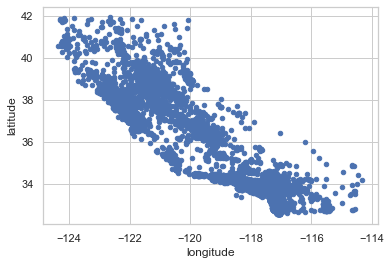

In [45]:
housing = train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude');

c参数需要避免单色，故可设置一个列作为c参数

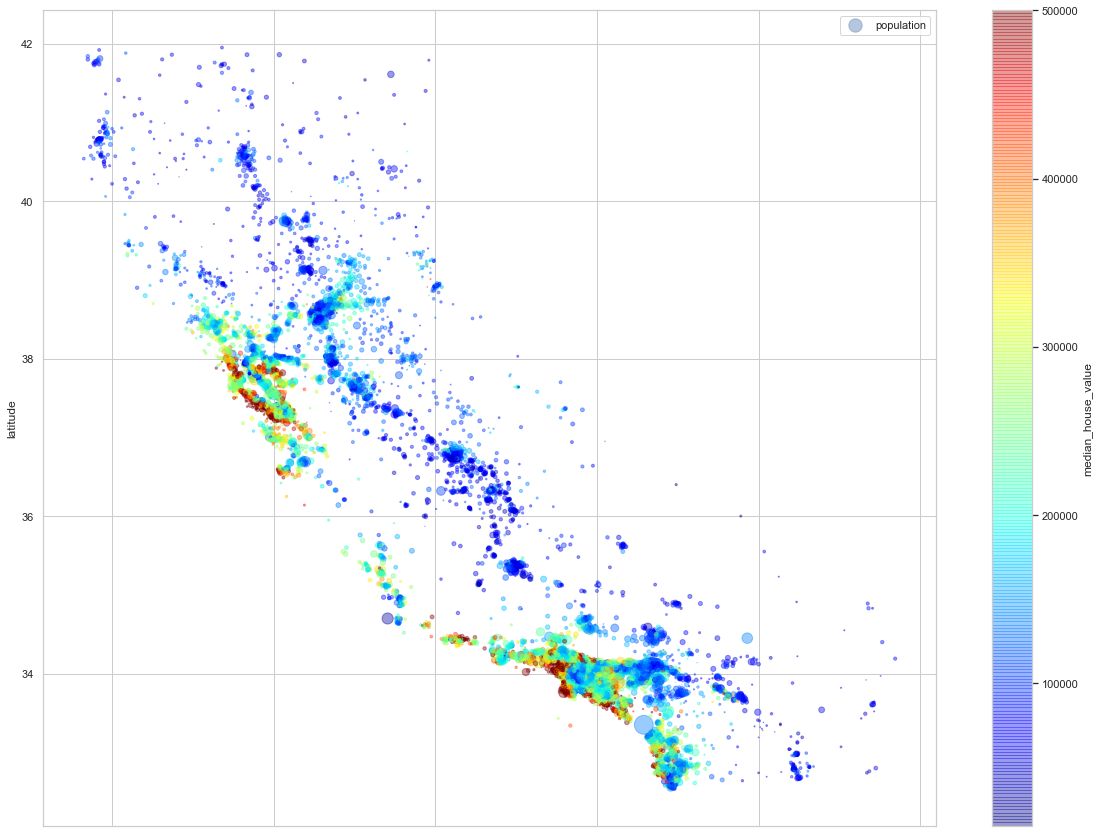

In [52]:
housing = train_set.copy()
# 可以放入series或列标签名，s、c是scatter特有参数
housing.plot(kind='scatter', figsize=(20, 15), x='longitude', y='latitude', alpha=0.4, 
             s=housing['population']/100, c='median_house_value', 
             cmap=plt.get_cmap('jet'), colorbar=True, label='population')
plt.legend();

### 寻找相关性

In [54]:
# 计算皮尔逊相关系数
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

可以看出房价中位数和收入中位数有中等程度的正相关，而与其他变量仅具有轻微相关性(仅线性相关而言)

### 尝试不同的属性组合
即创建性的计算字段以用于增强解释性并作为数据的新特征

In [55]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [56]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687160
rooms_per_household    0.146285
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
population            -0.026920
longitude             -0.047432
latitude              -0.142724
bedrooms_per_room     -0.259984
Name: median_house_value, dtype: float64

从中可以看到bedrooms_per_room的相关性较之前有提升，之后可以将其作为一个有效特征

---

## 机器学习的数据准备

In [57]:
# 训练集拆分为x和y
housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

### 数据清理

插补缺失值

In [62]:
from sklearn.impute import SimpleImputer
# 创建一个单变量imputer实例
imputer = SimpleImputer(strategy='median')
# 获取所有数值列
housing_num = housing.drop('ocean_proximity', axis=1)

In [64]:
# imputer相当于一个估算器，将一个中位数数组存在其statistics_中
imputer.fit(housing_num)
# 然后可以使用该实例填充空值，并返回为numpy数组
X = imputer.transform(housing_num)
# 返回的numpy数组重新创建为DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### 处理文本和分类属性

一般是将分类变量分为有序和无序，有序可转换为一般数值，无序可转换为独热编码

In [66]:
# 实现类别型数据转换为数值型数据
from sklearn.preprocessing import LabelEncoder
# 同上，创建一个实例估算器，拟合并转换数据集，返回一个np数组
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
# fit_transform是一种优化了的方式
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

上述转换方式存在比较，对于该特征不适合，因此使用独热编码

In [67]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# 改估算器需要放入表示类别的整数数值，且为列向量，因此需要转换，返回一个稀疏矩阵
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
# 转换为数组
housing_cat_1hot.toarray()

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

上面的独热估算器需要在特征已被编码为数值分类值的基础上进行，如果要直接将字符型分类值直接转换为独热编码可使用下方估算器

In [69]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
# 返回的是是数组
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### 自定义转换器：模块化、自动化优势

In [74]:
# 导入基类
from sklearn.base import BaseEstimator, TransformerMixin
# 创建所需的数据列的索引，减少日后的改动量
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
# 使用类来创建转换器，实现不同特征的组合
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    # 将默认的类放入，并预设超参数
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    # 定义类方法
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # 返回np数组并拼接为2维数组
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

### 数据转换需要特定的顺序，因此可以将这些操作封装在流水线中

In [79]:
# 特征缩放
from sklearn.preprocessing import StandardScaler
# 流水线
from sklearn.pipeline import Pipeline

In [81]:
num_pipeline = Pipeline([
    # 第一步进行插值
    ('imputer', SimpleImputer(strategy='median')),
    # 第二步增加新的属性组合
    ('attribs_adder', CombineAttributesAdder()),
    # 第三步进行特征缩放
    ('std_scaler', StandardScaler()),
])
# 调用流水线函数，返回np数组
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [96]:
# 需要编写一个选择器
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # 将dataframe保留某些列转换为np数组
        return X[self.attribute_names].values

In [103]:
# 创建一个LabelBinarizer衍生类，因为该类的transform方法发生了变化
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [105]:
# 实现一个更完整的，仅需要一个数据集作为参数的pipelin
from sklearn.pipeline import FeatureUnion  

# 获取一个由列标签组成的列表
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    # 增加一个选择器
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('encoder', MyLabelBinarizer()),
])
full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

# 并行运行两条pipeline，并将最终结果拼接，返回一个数组 
housing_prepared = full_pipeline.fit_transform(housing)

In [109]:
housing_prepared, housing_prepared.shape

(array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
          0.        ,  0.        ],
        [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
          0.        ,  0.        ],
        [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
          1.        ,  0.        ]]),
 (16512, 16))

---

## 选择和训练模型

### 培训和评估训练集

In [111]:
from sklearn.linear_model import LinearRegression

# 建立线性回归模型实例
lin_reg = LinearRegression()
# 拟合数据
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared), list(some_labels)

(array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
        189747.55849879]),
 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0])

In [113]:
# 使用rmse评估回归模型的性能，计算训练误差
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

有上可知房价中位数在12到16万之间，而rmse就达到了近7万美元，故模型欠拟合，需要更复杂的模型，下面尝试下决策树模型

In [114]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 使用交叉验证更好的评估决策树模型

In [117]:
# 交叉验证的第二种方式
from sklearn.model_selection import cross_val_score
# 计算交叉验证分数，返回10折交叉验证的每一折的结果
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([70911.96116992, 66524.88567695, 70504.45629976, 69694.04206946,
       69454.51612805, 74786.43723772, 71089.47930857, 71805.93057048,
       77096.94678335, 69097.54762646])

最终分数需在此基础上求平均值，如下

In [122]:
# 定义一个显示函数 
def display_scores(scores):
        print(scores.mean(),' +-', scores.std())
        
display_scores(rmse_scores)

71096.62028707244  +- 2829.617942650833


In [123]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

69052.46136345083  +- 2731.674001798349


可以看出稍微优于决策树，即决策树过拟合了，训练误差和验证误差相差还是很大，不断尝试多种模型，直到找到比较好的几个模型，然后调整超参数

---

## 微调模型

### 1.网格搜索
即在有限的参数空间中进行各种参数组合，然后返回一个最佳性能的参数组合

In [125]:
# 使用集成学习中的随机森林
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 3*4+2*3种组合
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()
# 尝试不同参数组合，拟合后返回搭配最佳参数组合的模型 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# 获取估计器集合的结果
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [126]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [128]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [134]:
cvres = grid_search.cv_results_['mean_test_score']
for x in cvres:
    print(np.sqrt(-x))

64481.125001579894
55648.173420465966
53051.36970134593
60251.84108781741
52893.53185518065
50477.612228719896
58837.13957479043
52039.754835497355
50025.574282159025
59029.77472148947
51945.808669621016
49881.291079395865
62580.05213365519
54005.50682895924
60083.59546029885
52679.88941835527
58445.81101980163
52055.80503696263


### 2.随机搜索
适用于搜索范围较大的情况
### 3.集成方法
组合最优模型

---
## 使用测试集评估模型

In [136]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)